<a href="https://colab.research.google.com/github/JaquelinedeJesus/Practicas-segundo-Parcial/blob/main/3.3%20Interpolaci%C3%B3n%20De%20Hermite%20Jaqueline%20de%20Jes%C3%BAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de Hermite:
                       5                       4                       3      
- 0.00277469135798944⋅x  + 0.0240317901231809⋅x  - 0.0145560802460553⋅x  - 0.2

                2                                           
35216169754413⋅x  - 0.00822922345577154⋅x + 1.00194406469105
Valor aproximado con x =1.5 es H (1.5) =0.511827701728395 


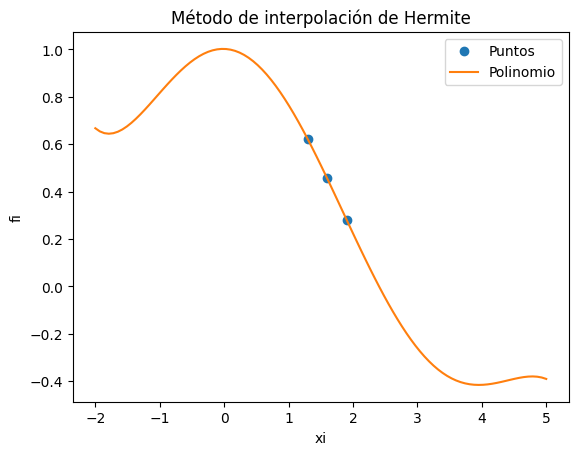

In [201]:
#3.3 Interpolación De Hermite Jaqueline de Jesús
import numpy as np
from sympy import Symbol , init_printing , lambdify , horner , expand , pprint
import matplotlib . pyplot as plt


x = Symbol ('x')
init_printing ( use_unicode = True )

#Definimos las variables
def diferencia (x , y , yp ) :
    n = len( x )
    z = np . empty ( shape =2 * n , dtype = float )
    Q = np . zeros ( shape =(2 * n , 2 * n ) , dtype = float )
    d = np . empty ( shape =2 * n , dtype = float )

#Creación del polinomio
    for i in np . arange ( n ) :
        z [2 * i] = x [ i ]
        z [2 * i + 1] = x [ i ]
        Q [2 * i ][0] = y [ i ]
        Q [2 * i + 1][0] = y [i ]
        Q [2 * i + 1][1] = yp [ i ]
        if i !=0:
            Q [2 * i ][1] = ( Q [2 * i ][0] - Q [2 * i - 1][0]) / ( z [2 * i ] - z [2 * i -1])

    for i in np . arange (2 , 2 * ( n - 1) + 2) :
        for j in np . arange (2 , i + 1) :
            f = Q [ i ][ j - 1] - Q [i - 1][ j - 1]
            g = z [ i] - z [ i - j ]
            Q [ i ][ j ] = f / g
    d = Q . diagonal ()
    return z , d

def polhermitesym (diff , z ) :
    n = len( z )-1
    pol = diff[ n ]
    for k in np . arange (1 , n + 1) :
        pol=diff[n-k]+( x - z [n-k])*pol
    return pol
#Entrada de datos del ejercicio 1
if __name__ ==  '__main__':
    datos_x = np . array ([1.3 , 1.6 , 1.9] , dtype = float )
    datos_y = np . array ([0.6200860 , 0.4554022 , 0.2818186] , dtype = float )
    datos_yp = [ -0.5220232 , -0.5698959 , -0.5811571]
#Salida
    d = diferencia( datos_x , datos_y , datos_yp)
    diff = d[1]
    polhermitesym = polhermitesym (diff, d[0])
    pprint ('Polinomio de Hermite:')
    pprint ( expand(polhermitesym))
    pprint ('Valor aproximado con x ={0} es H ({0}) ={1} '. format (1.5 , polhermitesym . subs (x , 1.5) ) )
#Gráfica
    polisimple=polhermitesym.expand()
    px=lambdify(x, polisimple)
    muestras=101
    pxi=np.linspace(-2,5,muestras)
    pfi=px(pxi)
    plt.plot(datos_x,datos_y,'o',label='Puntos')
    plt.plot(pxi,pfi,label='Polinomio')
    plt.legend()
    plt.xlabel('xi')
    plt.ylabel('fi')
    plt.title('Método de interpolación de Hermite')